In [0]:
import os, shutil
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [0]:
tf.__version__
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
# create you kaggle API token at your account, download the token (kaggle.json) in your local, and upload it here
!pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"airawan","key":"d6e4b58c04286bf2d86b0cc558f1b8b2"}'}

In [0]:
!ls

kaggle.json  sample_data


In [0]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d ahmetfurkandemr/mask-datasets-v1
!ls

 98% 742M/754M [00:08<00:00, 118MB/s] 
100% 754M/754M [00:08<00:00, 92.4MB/s]
kaggle.json  mask-datasets-v1.zip  sample_data


In [0]:
!unzip \*.zip  && rm *.zip

Archive:  mask-datasets-v1.zip
  inflating: Mask_Datasets/Train/Mask/1.PNG  
  inflating: Mask_Datasets/Train/Mask/10.PNG  
  inflating: Mask_Datasets/Train/Mask/100.PNG  
  inflating: Mask_Datasets/Train/Mask/101.PNG  
  inflating: Mask_Datasets/Train/Mask/102.PNG  
  inflating: Mask_Datasets/Train/Mask/103.PNG  
  inflating: Mask_Datasets/Train/Mask/104.PNG  
  inflating: Mask_Datasets/Train/Mask/105.PNG  
  inflating: Mask_Datasets/Train/Mask/106.PNG  
  inflating: Mask_Datasets/Train/Mask/107.PNG  
  inflating: Mask_Datasets/Train/Mask/108.PNG  
  inflating: Mask_Datasets/Train/Mask/109.PNG  
  inflating: Mask_Datasets/Train/Mask/11.PNG  
  inflating: Mask_Datasets/Train/Mask/110.PNG  
  inflating: Mask_Datasets/Train/Mask/111.PNG  
  inflating: Mask_Datasets/Train/Mask/112.PNG  
  inflating: Mask_Datasets/Train/Mask/113.PNG  
  inflating: Mask_Datasets/Train/Mask/114.PNG  
  inflating: Mask_Datasets/Train/Mask/115.PNG  
  inflating: Mask_Datasets/Train/Mask/116.PNG  
  inflating: 

In [0]:
!ls

kaggle.json  Mask_Datasets  sample_data


In [0]:
image_size = 150
batch_size = 32

train_dir = 'Mask_Datasets/Train/'
valid_dir = 'Mask_Datasets/Validation/'

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    rotation_range=40,
    shear_range=0.2,
    fill_mode='nearest',
    horizontal_flip=True,
)

valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_size,image_size),
    batch_size=batch_size,
    # class_mode='binary'
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(image_size,image_size),
    batch_size=batch_size,
    # class_mode='binary'
    class_mode='categorical'
)



Found 750 images belonging to 2 classes.
Found 350 images belonging to 2 classes.


In [0]:
IMG_SHAPE = (image_size, image_size, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                              include_top=False, 
                                              weights='imagenet')

base_model.trainable = False

model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(2, activation='softmax')
])

9412608/9406464 [==============================] - 0s 0us/step


In [0]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics = ['accuracy'])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
conv2d (Conv2D)              (None, 3, 3, 32)          368672    
_________________________________________________________________
dropout (Dropout)            (None, 3, 3, 32)          0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 2)                 66        
Total params: 2,626,722
Trainable params: 368,738
Non-trainable params: 2,257,984
_________________________________________________________________


In [0]:
print('Number of trainable variables = {}'.format(len(model.trainable_variables)))

Number of trainable variables = 4


In [0]:
%%time
history = model.fit(
    train_generator,
    epochs = 10,
    verbose=1,
    validation_data = valid_generator
)

Epoch 1/10
24/24 [==============================] - 28s 1s/step - loss: 0.3539 - accuracy: 0.9013 - val_loss: 0.0233 - val_accuracy: 0.9943
Epoch 2/10
24/24 [==============================] - 28s 1s/step - loss: 0.0739 - accuracy: 0.9840 - val_loss: 0.0261 - val_accuracy: 0.9914
Epoch 3/10
24/24 [==============================] - 29s 1s/step - loss: 0.0411 - accuracy: 0.9840 - val_loss: 0.0192 - val_accuracy: 0.9971
Epoch 4/10
24/24 [==============================] - 29s 1s/step - loss: 0.0227 - accuracy: 0.9960 - val_loss: 0.0072 - val_accuracy: 0.9971
Epoch 5/10
24/24 [==============================] - 29s 1s/step - loss: 0.0218 - accuracy: 0.9907 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 6/10
24/24 [==============================] - 29s 1s/step - loss: 0.0417 - accuracy: 0.9867 - val_loss: 0.0218 - val_accuracy: 0.9886
Epoch 7/10
24/24 [==============================] - 29s 1s/step - loss: 0.0199 - accuracy: 0.9920 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 8/10
24/24 [==

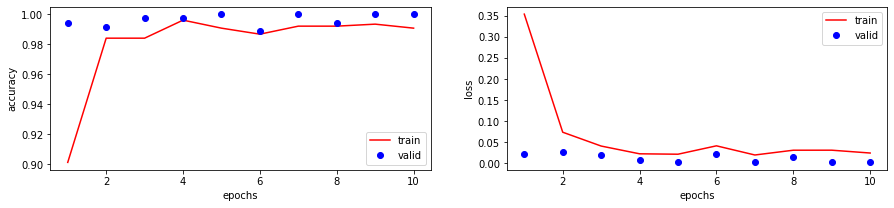

In [0]:
model.save('model.h5')
epochs = np.arange(1,len(history.history['loss'])+1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.figure(figsize=(15,3))
plt.subplot(121)
plt.plot(epochs, train_acc, 'r', label='train' )
plt.plot(epochs, val_acc, 'bo', label='valid')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.subplot(122)
plt.plot(epochs, train_loss, 'r', label='train')
plt.plot(epochs, val_loss, 'bo', label='valid')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [0]:
base_model.trainable = True

In [0]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  155


In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(1e-5),
              metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
conv2d (Conv2D)              (None, 3, 3, 32)          368672    
_________________________________________________________________
dropout (Dropout)            (None, 3, 3, 32)          0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 2)                 66        
Total params: 2,626,722
Trainable params: 2,231,330
Non-trainable params: 395,392
_________________________________________________________________


In [0]:
print('Number of trainable variables = {}'.format(len(model.trainable_variables)))

Number of trainable variables = 60


In [0]:
history_fine = model.fit(train_generator, 
                         steps_per_epoch=len(train_generator), 
                         epochs=10, 
                         validation_data=valid_generator, 
                         validation_steps=len(valid_generator))

Epoch 1/10
24/24 [==============================] - 30s 1s/step - loss: 0.2999 - accuracy: 0.8707 - val_loss: 0.0034 - val_accuracy: 0.9971
Epoch 2/10
24/24 [==============================] - 29s 1s/step - loss: 0.1991 - accuracy: 0.9280 - val_loss: 0.0048 - val_accuracy: 0.9971
Epoch 3/10
24/24 [==============================] - 29s 1s/step - loss: 0.1119 - accuracy: 0.9547 - val_loss: 0.0059 - val_accuracy: 0.9971
Epoch 4/10
24/24 [==============================] - 29s 1s/step - loss: 0.1029 - accuracy: 0.9680 - val_loss: 0.0073 - val_accuracy: 0.9971
Epoch 5/10
24/24 [==============================] - 29s 1s/step - loss: 0.1015 - accuracy: 0.9600 - val_loss: 0.0081 - val_accuracy: 0.9971
Epoch 6/10
24/24 [==============================] - 29s 1s/step - loss: 0.1061 - accuracy: 0.9547 - val_loss: 0.0092 - val_accuracy: 0.9971
Epoch 7/10
24/24 [==============================] - 29s 1s/step - loss: 0.0684 - accuracy: 0.9720 - val_loss: 0.0087 - val_accuracy: 0.9971
Epoch 8/10
24/24 [==

In [0]:
print (train_generator.class_indices)

labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('labelssoftmax.txt', 'w') as f:
  f.write(labels)

{'Mask': 0, 'No_mask': 1}


In [0]:
!ls

kaggle.json  labelssoftmax.txt	Mask_Datasets  model.h5  sample_data


In [0]:
#saved_model_dir = 'model'
#tf.saved_model.save(model, saved_model_dir)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('modelbase.tflite', 'wb') as f:
  f.write(tflite_model)

In [0]:
!ls

kaggle.json	   Mask_Datasets     model.h5
labelssoftmax.txt  modelbase.tflite  sample_data


In [0]:
from google.colab import files

files.download('modelbase.tflite')
# files.download('labelssoftmax.txt')
# files.download('model.h5') #uncomment if you need the regular model

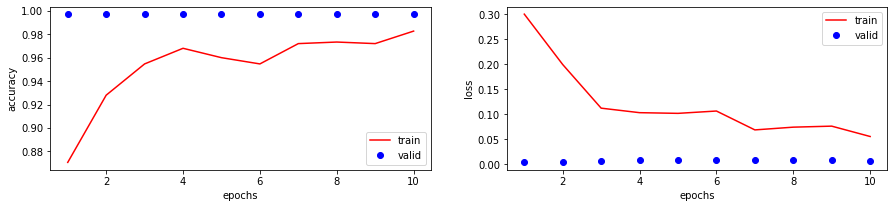

In [0]:
epochs = np.arange(1,len(history_fine.history['loss'])+1)
train_loss =history_fine.history['loss']
val_loss = history_fine.history['val_loss']

train_acc = history_fine.history['accuracy']
val_acc = history_fine.history['val_accuracy']
plt.figure(figsize=(15,3))
plt.subplot(121)
plt.plot(epochs, train_acc, 'r', label='train' )
plt.plot(epochs, val_acc, 'bo', label='valid')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.subplot(122)
plt.plot(epochs, train_loss, 'r', label='train')
plt.plot(epochs, val_loss, 'bo', label='valid')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [0]:
history_fine.history

{'accuracy': [0.8706666827201843,
  0.9279999732971191,
  0.9546666741371155,
  0.9679999947547913,
  0.9599999785423279,
  0.9546666741371155,
  0.972000002861023,
  0.9733333587646484,
  0.972000002861023,
  0.9826666712760925],
 'loss': [0.2998906373977661,
  0.19909852743148804,
  0.11188510060310364,
  0.10285007953643799,
  0.10149025171995163,
  0.10614551603794098,
  0.06840234994888306,
  0.07388942688703537,
  0.075914166867733,
  0.05520348995923996],
 'val_accuracy': [0.9971428513526917,
  0.9971428513526917,
  0.9971428513526917,
  0.9971428513526917,
  0.9971428513526917,
  0.9971428513526917,
  0.9971428513526917,
  0.9971428513526917,
  0.9971428513526917,
  0.9971428513526917],
 'val_loss': [0.00344506511464715,
  0.004752187058329582,
  0.005912267602980137,
  0.007285820320248604,
  0.008078709244728088,
  0.00921539030969143,
  0.00869029015302658,
  0.00873013399541378,
  0.00802950281649828,
  0.007139086723327637]}